<a href="https://colab.research.google.com/github/sfansaria/Instagram-Reach-Analysis/blob/main/InstagramReachAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


data = pd.read_csv("/content/drive/My Drive/ml_datasets/Instagram data.csv",encoding = 'latin1')
data.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

In [ ]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<ipython-input-238-e46980d30743>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




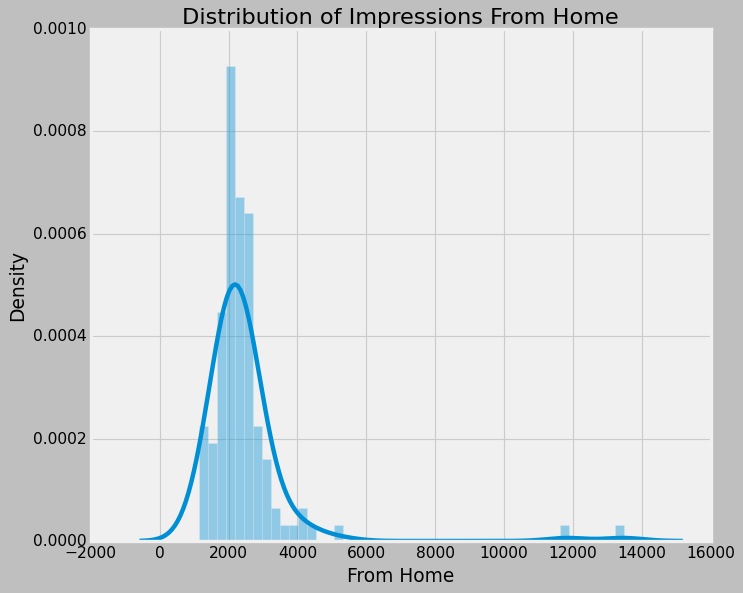

In [ ]:
#Analyzing Instagram Reach#

plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

<ipython-input-239-bcf9c7d03da7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




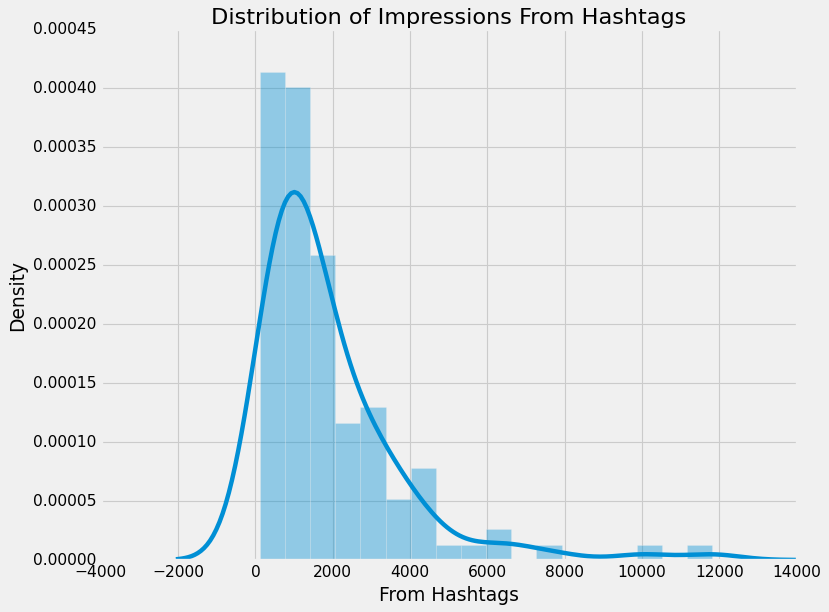

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

<ipython-input-240-44e6f6b98eb0>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




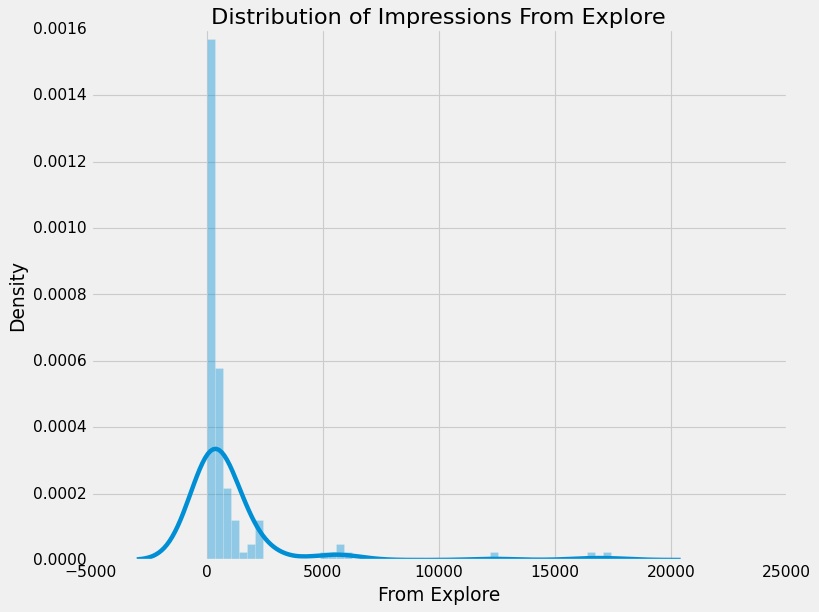

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [ ]:
#Percentage of impressions from the various sources on Instagram

home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]
fig = px.pie(data, values=values, names=labels, title = 'Impressions on Instagram Posts From Various Sources',hole=0.5)
fig.show()

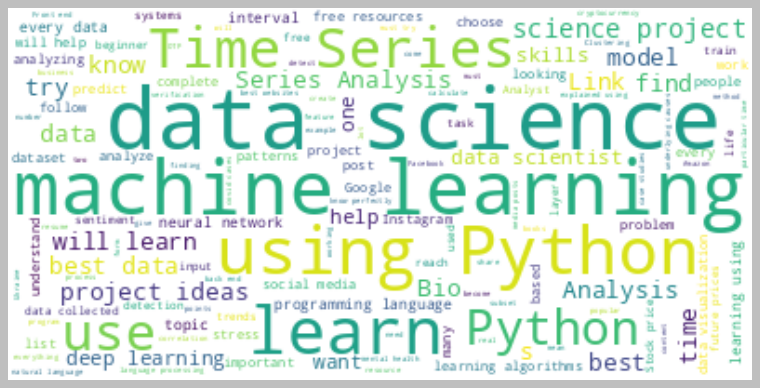

In [ ]:
from pickle import STOP
#Analyzing Content

#Create a wordcloud of the caption to look at the most used words in the caption of Instagram post

text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

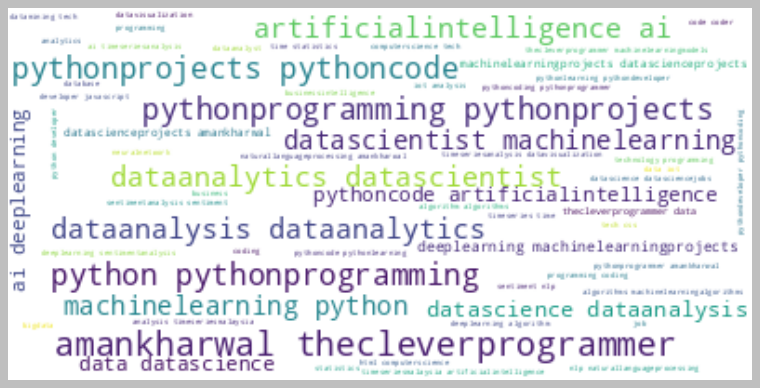

In [ ]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Analyzing Relationships
#relation between the number of likes and the number of impressions
figure = px.scatter(data_frame = data, x="Impressions",y="Likes", size="Likes", trendline = "ols",title="Relationship Between Likes and Impressions")
figure.show()

In [ ]:
#Relationship between the number of comments and the number of impressions on the Instagram posts

figure = px.scatter(data_frame = data, x="Impressions",y="Comments",size="Comments",trendline="ols",title = "Relationship Between Comments and Total Impressions")
figure.show()



In [ ]:
#Relationship between the number of share and the number of impressions

figure = px.scatter(data_frame = data, x="Impressions",y="Shares",size="Shares",trendline="ols",title="Relationship Between Shares and Total Impressions")
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x = "Impressions",y="Saves",size="Saves",trendline="ols",title="Relationship Between Post Saves and Total Impressions")
figure.show()

In [ ]:
correlation = data.corr()
correlation["Impressions"].sort_values(ascending=False)


<ipython-input-248-e3e62f3d3ef5>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [ ]:
#Analyzing the Conversion Rate
#how many of profile visitors adds to the number of followers
#(Follows/Profile_visits)*100

conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
conversion_rate

41.00265604249668

In [ ]:
#Relationship between the total visits and the number of followers gained from all profile visits

figure = px.scatter(data_frame = data, x= "Profile Visits", y="Follows", size="Follows",trendline="ols",title="Relationship Between Profile Visits and Followers Gained")
figure.show()

In [ ]:
#Prediction Model

x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42)



In [ ]:
#Passive Aggressive Regressor
model = PassiveAggressiveRegressor()
model_fit = model.fit(xtrain, ytrain)
accuracy = model_fit.score(xtest, ytest)
accuracy

0.9059885151303538

In [ ]:
y_pred = model_fit.predict(xtest)
y_pred

array([ 5785.57313239,  8711.53191232,  3620.52536963,  7060.32918965,
        5183.00958634, 25734.01009931,  3465.80846716,  2730.09667161,
       12084.24113553,  4519.07053732,  6064.51723956,  8750.09624316,
        4605.74246497,  3538.83322317,  5079.62771684,  4576.60351293,
        3666.97720202,  5061.41102467,  4670.9903968 ,  5604.05512896,
       10116.92550974, 18339.11679792,  5183.00958634,  6643.98306338])

In [ ]:
#Features = [['Likes','Saves','Comments','Shares','Profile Visits','Follows']]
features = np.array([[282, 233, 4, 9,165, 54]])
model.predict(features)

array([11561.66074447])

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_l = LinearRegression()

model_fit_l = model_l.fit(xtrain,ytrain)

In [ ]:
accuracy_l = model_fit_l.score(xtest,ytest)
accuracy_l

0.8777977785012779

In [ ]:
y_pred_l = model_fit_l.predict(xtest)
y_pred_l

array([ 4859.66683817,  7912.81983993,  3522.14792981,  6357.24002726,
        3123.92251273, 24312.21415274,  4334.53593683,  2694.56348   ,
       12583.43392081,  3769.05539123,  5399.3289916 ,  8420.00571551,
        3552.95469539,  2252.67931341,  4104.43710195,  2580.37986388,
        3889.38026032,  4078.74309397,  4004.94186314,  5014.59714961,
       10260.0501693 , 16371.34630207,  3123.92251273,  5960.49763242])

In [ ]:
r2 = r2_score(ytest, y_pred)
"R2 Score:",r2

('R2 Score:', 0.9059885151303538)

In [ ]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor(max_depth=2,random_state=0)
model_forest_fit = model_forest.fit(xtrain,ytrain)
accuracy_forest = model_forest_fit.score(xtest,ytest)
accuracy_forest

0.8576507021983018

In [ ]:
y_pred_forest = model_forest_fit.predict(xtest)
y_pred_forest

array([ 4499.3996624 ,  4988.99881372,  3886.83968314,  4764.27151242,
        4357.77247958, 23720.24938168,  3886.83968314,  3886.83968314,
       13977.6957642 ,  3978.96344888,  4753.31157439, 10751.90520714,
        4309.44639541,  3886.83968314,  4401.57016115,  4309.44639541,
        3886.83968314,  4387.47862122,  4309.44639541,  4506.38633685,
       10555.77149453, 13978.33987974,  4357.77247958,  4710.8034751 ])

In [ ]:
# KNeighborRegressor
from sklearn.neighbors import KNeighborsRegressor

model_n = KNeighborsRegressor(n_neighbors=3)
model_n_fit = model_n.fit(xtrain,ytrain)
accuracy_n = model_n_fit.score(xtest,ytest)
accuracy_n

0.7766153206725332

In [ ]:
y_pred_n = model_n_fit.predict(xtest)
y_pred_n

array([ 4892.66666667,  6566.        ,  3345.66666667,  7916.        ,
        4779.66666667, 20335.        ,  3470.        ,  3428.33333333,
       13933.        ,  4182.33333333,  5849.66666667,  7916.        ,
        3849.33333333,  2901.66666667,  4204.66666667,  4113.66666667,
        3379.33333333,  4817.66666667,  4393.33333333,  4650.66666667,
        6413.66666667, 12998.66666667,  4779.66666667,  7047.66666667])

In [ ]:
results = pd.DataFrame({'Model':['Passive Aggressive Regressor', 'Linear Regression', 'Random Forest Regressor', 'KNeighbors Regressor'],'Accuracy Score':[accuracy, accuracy_l, accuracy_forest, accuracy_n]})
result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

Accuracy Score
Model                                       
Passive Aggressive Regressor        0.905989
Linear Regression                   0.877798
Random Forest Regressor             0.857651
KNeighbors Regressor                0.776615

In [ ]:
! pip install pandas-profiling
#profile.to_notebooks_iframe()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]